# Hypothesis 1 - Impact of Defendant - Data Cleaning

### Import Dependencies

In [651]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
import plotly
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import warnings

### Set Notebook Configurations

In [652]:
# Set configurations
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

np.random.seed = 42

warnings.filterwarnings('ignore')

%matplotlib inline

---

###  Import Original Data Set

In [653]:
# Import original dataset

df = pd.read_csv("mock-jury-stalking-data-original.csv")

df.head()

,ATTN-CIV1-1,ATTN-CIV1-2,ATTN-CIV1-3,ATTN-CIV1-4,ATTN-CIV1-5,ATTN-CIV1-6,ATTN-CIV1-7,DEC-RATE-CIV1,DEC-CIV1-1,WHY-DEC-CIV1,DEC-CIV1-2,COMPENSATORY-CIV1\n,COMP-MAX-CIV1,ATTN-CIV3-1,ATTN-CIV3-2,ATTN-CIV3-3,ATTN-CIV3-3.1,ATTN-CIV3-2.1,ATTN-CIV3-4,ATTN-CIV3-4.1,DEC-RATE-CIV3,DEC-CIV3-1,WHY-DEC-CIV3,DEC-CIV3-2,COMPENSATORY-CIV3\n,COMP-MAX-CIV3,ATTN-CRIM-1,ATTN-CRIM-2,ATTN-CRIM-3,ATTN-CRIM-4,ATTN-CRIM-5,ATTN-CRIM-6,ATTN-CRIM-7,DEC-RATE-CRIM,DEC-CRIM-1,WHY-DEC-CRIM,DEC-CRIM-2,COMPENSATORY-CRIM\n,COMP-MAX-CRIM,VICCRED,VICBELIEVE,VICHONEST,VICBLAME,VICRESP,VICDISTRESS,VICFEAR,VICANNOY,VICFLATTER,VICSYMP,VICANGER,VICGREED,VICLIKE,VICSELFISH,PERPCRED,PERPBELIEVE,PERPHONEST,PERPBLAME,PERPRESP,PERPDANGER,PERPDISTRESS,PERPFEAR,PERPSYMP,PERPANGER,GENDER,AGE,CITIZEN,RACE,JURYSERVE,TIMESSERVE,JURYCRIME,JURYOUTCOME,JURYUNANIMOUS,Unnamed: 72,Unnamed: 73,DEC-ALL,DUM-CIV3,ANY-DAMAGE-MAX,DUM-CIV-ALL
0,1.0,2.0,5.0,1.0,1.0,2.0,1.0,7.0,1.0,"Defendant admits to being highly emotional, ye...",1.0,5000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0,10.0,1.0,1.0,8.0,6.0,10.0,2.0,10.0,1.0,1.0,6.0,1.0,3.0,3.0,2.0,10.0,10.0,5.0,5.0,4.0,2.0,6.0,1.0,48.0,1.0,3,2.0,NaN,NaN,NaN,NaN,A2VE5IV9OD2SK1,civ1,1.0,0,0.0,NaN
1,1.0,2.0,5.0,1.0,1.0,3.0,1.0,15.0,1.0,I felt that a reasonable person would be very ...,1.0,10000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,10.0,2.0,2.0,8.0,9.0,10.0,1.0,9.0,1.0,1.0,9.0,1.0,2.0,2.0,2.0,10.0,10.0,8.0,8.0,7.0,1.0,9.0,2.0,64.0,1.0,3,2.0,NaN,NaN,NaN,NaN,A25FJAJGTWFMP,civ1,1.0,0,1.0,NaN
2,1.0,2.0,5.0,1.0,1.0,2.0,1.0,8.0,1.0,Her stories are very elaborate in how the emai...,1.0,5000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,9.0,1.0,7.0,9.0,8.0,10.0,1.0,1.0,9.0,1.0,9.0,1.0,1.0,4.0,5.0,10.0,10.0,9.0,9.0,9.0,1.0,9.0,2.0,24.0,1.0,1,2.0,NaN,NaN,NaN,NaN,A39KJNWAFOD7N1,civ1,1.0,0,0.0,NaN
3,1.0,2.0,5.0,1.0,1.0,3.0,1.0,6.0,2.0,"If he had been asked to stop in writing, like ...",2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,4.0,1.0,1.0,7.0,8.0,6.0,3.0,6.0,1.0,1.0,5.0,5.0,6.0,7.0,7.0,8.0,7.0,2.0,1.0,1.0,6.0,2.0,1.0,33.0,1.0,3,2.0,NaN,NaN,NaN,NaN,A1U46YK7C5HEY1,civ1,0.0,0,NaN,NaN
4,1.0,2.0,5.0,1.0,1.0,3.0,1.0,1.0,2.0,I believe there is a lot of circumstantial evi...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,6.0,1.0,1.0,6.0,1.0,4.0,1.0,10.0,1.0,1.0,6.0,1.0,10.0,10.0,10.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,40.0,1.0,8,2.0,NaN,NaN,NaN,NaN,A3NMU6AVMQ0QDB,civ1,0.0,0,NaN,NaN


### Coding Legend

| y| | | | | | | | | | |
|:-------------:|---------------------|---------------------|-------------------|----------------------------|-----------------------|----------------|-------------|---|---|---|
|   __GENDER__  | `1` = Male          | `2` = Female        | `3` = Transgender | `4` = Prefer not to answer |                       |                |             |
| __CITIZEN__   | `1` = Yes           | `2` = No            |                   |                            |                       |                |             |
| __RACE__      | `1` = Asian         | `2` = Black         | `3` = White       | `4` = Middle Eastern       | `5` = Native American | `6` = Hispanic | `8` = Other |
| __JURYSERVE__ | `1` = Yes           | `2` = No            |                   |                            |                       |                |             |
| __DEC-ALL__   | `0` = Pro-defendant | `1` = Pro-plaintiff |                   |                            |                       |                |             |

---

### Select Relevant Variables Only

In [654]:
hyp1_df = df[["DEC-ALL", "DUM-CIV3", "GENDER", "AGE"]].copy()
hyp1_df.head()

,DEC-ALL,DUM-CIV3,GENDER,AGE
0,1.0,0,1.0,48.0
1,1.0,0,2.0,64.0
2,1.0,0,2.0,24.0
3,0.0,0,1.0,33.0
4,0.0,0,4.0,40.0


In [655]:
hyp1_df.shape

(216, 4)

In [656]:
hyp1_df.describe()

,DEC-ALL,DUM-CIV3,GENDER,AGE
count,188.000000,216.000000,182.000000,182.000000
mean,0.691489,0.324074,1.593407,45.269231
std,0.463112,0.469115,0.555794,12.823021
min,0.000000,0.000000,1.000000,23.000000
25%,0.000000,0.000000,1.000000,35.000000
50%,1.000000,0.000000,2.000000,43.000000
75%,1.000000,1.000000,2.000000,54.000000
max,1.000000,1.000000,4.000000,74.000000


<div style="padding: 20px; border-radius: 20px; background-color: #f9f9f9;">
    <div style="display: flex; flex-direction: row; align-items: flex-start;">
        <div style="flex-shrink: 0; margin-right: 20px; font-size: 2.5em;">⚠️</div>
        <div style="flex-grow: 1;">
            <p>We can see just by the <code>count</code> for each variable in the description matrix above that there are some missing values.<br />
            Let's take a closer look and find all the rows that have <i>any</i> missing values 👇</p>
    </div>
</div>

In [657]:
hyp1_df["any_missing_values"] = hyp1_df.isnull().any(axis=1)
hyp1_df[hyp1_df["any_missing_values"] == True][["DEC-ALL", "DUM-CIV3", "GENDER", "AGE"]]

,DEC-ALL,DUM-CIV3,GENDER,AGE
60,NaN,0,NaN,NaN
119,NaN,1,NaN,NaN
121,NaN,1,NaN,NaN
122,NaN,1,NaN,NaN
123,NaN,1,NaN,NaN
126,NaN,1,NaN,NaN
127,NaN,1,NaN,NaN
128,NaN,1,NaN,NaN
129,NaN,1,NaN,NaN
131,NaN,1,NaN,NaN


In [658]:
hyp1_df[hyp1_df["any_missing_values"] == True].shape

(34, 5)

Looks like we have `34` records that have at least one missing value.

Let's remove these rows, re-index the dataframe, and remove the `any_missing_values` column.

In [659]:
missing_values_index = hyp1_df[hyp1_df["any_missing_values"] == True].index

In [660]:
hyp1_df.drop(index=missing_values_index, axis=1, inplace=True)
hyp1_df.describe()

,DEC-ALL,DUM-CIV3,GENDER,AGE
count,182.000000,182.000000,182.000000,182.000000
mean,0.681319,0.296703,1.593407,45.269231
std,0.467251,0.458065,0.555794,12.823021
min,0.000000,0.000000,1.000000,23.000000
25%,0.000000,0.000000,1.000000,35.000000
50%,1.000000,0.000000,2.000000,43.000000
75%,1.000000,1.000000,2.000000,54.000000
max,1.000000,1.000000,4.000000,74.000000


In [661]:
hyp1_df = hyp1_df.reset_index(drop=True)
hyp1_df.drop(columns=["any_missing_values"], inplace=True)
hyp1_df.shape

(182, 4)

Ok from here we should have a full data set with no missing values. Let's shuffle the data set and take a look at a slice of it just for review.

In [662]:
hyp1_df.sample(frac=1).head(10)

,DEC-ALL,DUM-CIV3,GENDER,AGE
152,1.0,0,1.0,45.0
68,1.0,0,2.0,38.0
130,1.0,0,1.0,34.0
125,0.0,0,1.0,35.0
59,0.0,0,1.0,31.0
74,1.0,1,2.0,54.0
18,1.0,0,2.0,34.0
43,1.0,0,4.0,34.0
116,1.0,1,1.0,43.0
137,1.0,0,2.0,56.0


✅ Data looks good to me! Let's take this opportunity to convert the `float` values to `int` values.

In [663]:
hyp1_df = hyp1_df.astype({ "DEC-ALL": int, "GENDER": int, "AGE": int })
hyp1_df.sample(frac=1).head(10)

,DEC-ALL,DUM-CIV3,GENDER,AGE
176,0,0,1,28
127,1,0,1,35
103,0,1,1,33
92,0,1,2,42
77,1,1,2,34
5,1,0,2,63
114,0,1,2,39
17,1,0,1,48
120,1,1,2,32
79,1,1,2,36


Let's take a look at each individual variable to see if there are any odd values we don't expect.

In [664]:
for column in hyp1_df.columns:
    print(f"{column}: {hyp1_df[column].unique()}")

DEC-ALL: [1 0]
DUM-CIV3: [0 1]
GENDER: [1 2 4]
AGE: [48 64 24 33 40 63 66 61 57 39 44 32 38 31 42 34 30 55 49 51 37 46 58 62
 54 53 36 65 70 73 45 41 74 29 71 43 47 69 25 28 60 35 23 56 50 52]


✅ Data looks good to me! Let's check for outliers.

---

### Check for Outliers

In [665]:
numerical_cols = hyp1_df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    hyp1_df[f'{col}_zscore'] = hyp1_df[col].apply(lambda x: (x - hyp1_df[col].mean()) / hyp1_df[col].std())

In [666]:
hyp1_df.head()

,DEC-ALL,DUM-CIV3,GENDER,AGE,DEC-ALL_zscore,DUM-CIV3_zscore,GENDER_zscore,AGE_zscore
0,1,0,1,48,0.682035,-0.647732,-1.067674,0.212958
1,1,0,2,64,0.682035,-0.647732,0.731555,1.460714
2,1,0,2,24,0.682035,-0.647732,0.731555,-1.658675
3,0,0,1,33,-1.458144,-0.647732,-1.067674,-0.956813
4,0,0,4,40,-1.458144,-0.647732,4.330013,-0.410920


In [667]:
# Check if absolute value is >= 3
zscore_columns = ["DEC-ALL_zscore", "DUM-CIV3_zscore", "GENDER_zscore", "AGE_zscore"]
hyp1_df["z_score_3_outlier"] = (hyp1_df[zscore_columns].abs() >= 3).any(axis=1)
hyp1_df[hyp1_df["z_score_3_outlier"] == True]

,DEC-ALL,DUM-CIV3,GENDER,AGE,DEC-ALL_zscore,DUM-CIV3_zscore,GENDER_zscore,AGE_zscore,z_score_3_outlier
4,0,0,4,40,-1.458144,-0.647732,4.330013,-0.410920,True
43,1,0,4,34,0.682035,-0.647732,4.330013,-0.878828,True


Looks like we found 2 outliers ☝️ Let's remove them

In [668]:
# Get index of rows WHERE outliers are True (the ones you want to REMOVE)
outliers_index = hyp1_df[hyp1_df["z_score_3_outlier"]].index
# Drop those rows
hyp1_df.drop(index=outliers_index, inplace=True)
hyp1_df.describe()

,DEC-ALL,DUM-CIV3,GENDER,AGE,DEC-ALL_zscore,DUM-CIV3_zscore,GENDER_zscore,AGE_zscore
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.683333,0.300000,1.566667,45.361111,0.004312,0.007197,-0.048111,0.007165
std,0.466474,0.459536,0.496918,12.860560,0.998337,1.003211,0.894069,1.002927
min,0.000000,0.000000,1.000000,23.000000,-1.458144,-0.647732,-1.067674,-1.736660
25%,0.000000,0.000000,1.000000,35.000000,-1.458144,-0.647732,-1.067674,-0.800843
50%,1.000000,0.000000,2.000000,43.000000,0.682035,-0.647732,0.731555,-0.176965
75%,1.000000,1.000000,2.000000,54.250000,0.682035,1.535365,0.731555,0.700363
max,1.000000,1.000000,2.000000,74.000000,0.682035,1.535365,0.731555,2.240562


Now let's remove the unnecessary columns:
* z_score_3_outlier
* DEC-ALL_zscore
* DUM-CIV3_zscore
* GENDER_zscore
* AGE_zscore

In [669]:
hyp1_df = hyp1_df.reset_index(drop=True)
hyp1_df.drop(columns=["z_score_3_outlier", "DEC-ALL_zscore", "DUM-CIV3_zscore", "GENDER_zscore", "AGE_zscore"], inplace=True)
hyp1_df.shape

(180, 4)

In [670]:
hyp1_df.head()

,DEC-ALL,DUM-CIV3,GENDER,AGE
0,1,0,1,48
1,1,0,2,64
2,1,0,2,24
3,0,0,1,33
4,1,0,2,63


---

### Test Assumptions!

#### Additivity (multi-colinearity)

In [671]:
# Define variables as per the hypothesis
X = hyp1_df[['GENDER', 'AGE', 'DUM-CIV3']]  # Independent variables
y = hyp1_df['DEC-ALL']  # Dependent variable

# Add constant for statsmodels
X = add_constant(X)

print("Variable descriptions:")
print("DEC-ALL: Decision for plaintiff (1) or not (0)")
print("DUM-CIV3: Dummy for Civil 3rd party case (university defendant) (1) vs others (0)")
print("GENDER: Gender of mock juror (1 or 2)")
print("AGE: Age of mock juror")

Variable descriptions:
DEC-ALL: Decision for plaintiff (1) or not (0)
DUM-CIV3: Dummy for Civil 3rd party case (university defendant) (1) vs others (0)
GENDER: Gender of mock juror (1 or 2)
AGE: Age of mock juror


In [672]:
# VIF values above 5-10 indicate potential multicollinearity issues
print("Checking for multicollinearity using Variance Inflation Factor (VIF):")
X_vif = hyp1_df[['GENDER', 'AGE', 'DUM-CIV3']]
X_vif = add_constant(X_vif)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

Checking for multicollinearity using Variance Inflation Factor (VIF):
    Feature        VIF
0     const  22.471392
1    GENDER   1.005985
2       AGE   1.005301
3  DUM-CIV3   1.001782


Testing linearity of the logit for continuous variable AGE:


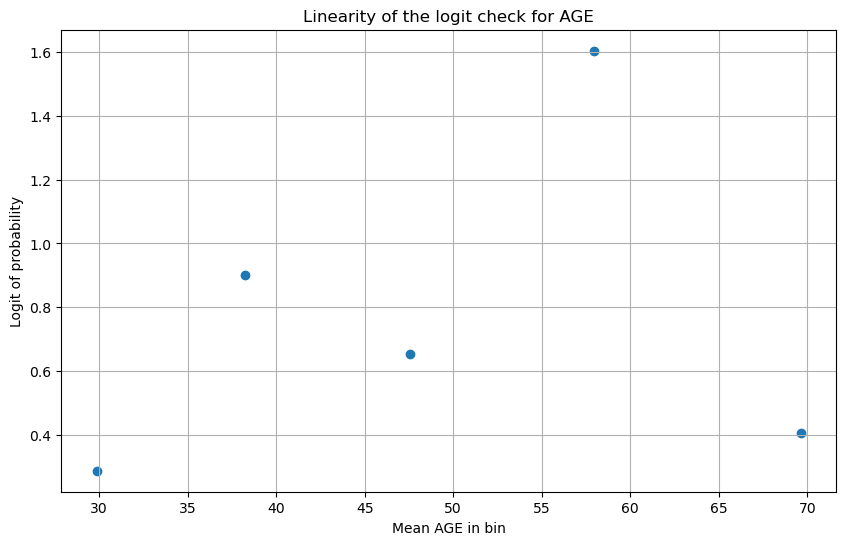

Correlation between mean AGE and logit of probability: 0.240
A high correlation suggests linearity of the logit.


In [673]:
# This involves checking if the logit transformation is linearly related to continuous predictors
print("Testing linearity of the logit for continuous variable AGE:")

# Create binned groups for AGE
df['AGE_binned'] = pd.cut(df['AGE'], bins=5, duplicates='drop')
df['logit_p'] = np.log((df.groupby('AGE_binned')['DEC-ALL'].transform('mean') + 0.001) / 
                       (1 - df.groupby('AGE_binned')['DEC-ALL'].transform('mean') + 0.001))

# Plot the relationship
plt.figure(figsize=(10, 6))
mean_age = df.groupby('AGE_binned')['AGE'].mean()
logit_p = df.groupby('AGE_binned')['logit_p'].mean()
plt.scatter(mean_age, logit_p)
plt.xlabel('Mean AGE in bin')
plt.ylabel('Logit of probability')
plt.title('Linearity of the logit check for AGE')
plt.grid(True)
plt.show()

# Check correlation
correlation = np.corrcoef(mean_age, logit_p)[0, 1]
print(f"Correlation between mean AGE and logit of probability: {correlation:.3f}")
print("A high correlation suggests linearity of the logit.")

#### Normality

In [674]:
# Cell 8: Check for normality of residuals (corrected version)
# Logistic regression doesn't assume normality of residuals in the same way as linear regression
# But we can examine the distribution of residuals

# First, we need to fit the models (doing this earlier than in the original sequence)
print("Performing Hierarchical Logistic Regression to get models for residual analysis:")

# Step 1: Model with GENDER and AGE
X_step1 = hyp1_df[['GENDER', 'AGE']]
X_step1 = add_constant(X_step1)
model_step1 = sm.Logit(y, X_step1).fit(disp=0)  # disp=0 to suppress output

# Step 2: Model with GENDER, AGE, and DUM-CIV3
X_step2 = hyp1_df[['GENDER', 'AGE', 'DUM-CIV3']]
X_step2 = add_constant(X_step2)
model_step2 = sm.Logit(y, X_step2).fit(disp=0)  # disp=0 to suppress output

print("Examining residual distribution (using final model):")

# Calculate deviance residuals with better handling
fitted_model = model_step2  # Using the final model from our analysis
predicted_probs = fitted_model.predict(X_step2)

# Check for any problematic predicted probabilities
print(f"Min predicted probability: {predicted_probs.min():.6f}")
print(f"Max predicted probability: {predicted_probs.max():.6f}")
print(f"Number of predictions at or near 0: {np.sum(predicted_probs < 1e-10)}")
print(f"Number of predictions at or near 1: {np.sum(predicted_probs > 1-1e-10)}")

# Calculate deviance residuals with better numerical stability
# Clip predicted probabilities to avoid log(0)
eps = 1e-15
predicted_probs_clipped = np.clip(predicted_probs, eps, 1-eps)

# Calculate deviance residuals
deviance_residuals = np.sign(y - predicted_probs_clipped) * np.sqrt(
    2 * (y * np.log(y / (predicted_probs_clipped + 1e-10)) + 
         (1 - y) * np.log((1 - y) / (1 - predicted_probs_clipped + 1e-10))))

# Check for any NaN or infinite values
nan_count = np.sum(np.isnan(deviance_residuals))
inf_count = np.sum(np.isinf(deviance_residuals))
print(f"Number of NaN residuals: {nan_count}")
print(f"Number of infinite residuals: {inf_count}")

# Remove NaN and infinite values for plotting
valid_indices = np.isfinite(deviance_residuals)
deviance_residuals_clean = deviance_residuals[valid_indices]

if len(deviance_residuals_clean) > 0:
    # Plot histogram of deviance residuals
    plt.figure(figsize=(10, 6))
    plt.hist(deviance_residuals_clean, bins=20, edgecolor='black')
    plt.xlabel('Deviance Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Deviance Residuals')
    plt.grid(True)
    plt.show()

    # Q-Q plot
    fig = plt.figure(figsize=(10, 6))
    stats.probplot(deviance_residuals_clean, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Deviance Residuals")
    plt.grid(True)
    plt.show()

    # Shapiro-Wilk test for normality (only if we have enough data points)
    if len(deviance_residuals_clean) >= 3:
        shapiro_stat, shapiro_p = stats.shapiro(deviance_residuals_clean)
        print(f"Shapiro-Wilk test for normality of residuals:")
        print(f"Statistic: {shapiro_stat:.3f}, p-value: {shapiro_p:.3f}")
    else:
        print("Not enough valid residuals for Shapiro-Wilk test")
else:
    print("No valid residuals to plot or test")

print("Note: In logistic regression, normality of residuals is not a strict assumption.")

Performing Hierarchical Logistic Regression to get models for residual analysis:
Examining residual distribution (using final model):
Min predicted probability: 0.612241
Max predicted probability: 0.756019
Number of predictions at or near 0: 0
Number of predictions at or near 1: 0
Number of NaN residuals: 180
Number of infinite residuals: 0
No valid residuals to plot or test
Note: In logistic regression, normality of residuals is not a strict assumption.


#### Linearity

#### Homogeneity

In [675]:
# Check for homogeneity (no perfect separation)
# Perfect separation occurs when a linear combination of predictors perfectly predicts the outcome
print("Checking for perfect separation:")

# Simple check: see if any combination of predictors perfectly predicts the outcome
crosstab_check = pd.crosstab([df['GENDER'], df['DUM-CIV3']], df['DEC-ALL'], margins=True)
print("Crosstab of predictors vs outcome:")
print(crosstab_check)

# If any cell has 0 in the outcome, it might indicate separation issues
# We'll use statsmodels for a more formal check during model fitting

Checking for perfect separation:
Crosstab of predictors vs outcome:
DEC-ALL          0.0  1.0  All
GENDER DUM-CIV3               
1.0    0          17   39   56
       1           7   15   22
2.0    0          22   48   70
       1          11   21   32
4.0    0           1    1    2
All               58  124  182


In [676]:
#### Homoscedasticity

In [677]:
# Cell 7: Check for homoscedasticity (in the context of logistic regression)
# Logistic regression doesn't assume homoscedasticity in the same way as linear regression
# However, we can check for overdispersion
print("Checking for overdispersion (a form of heteroscedasticity in logistic regression):")

# Fit the logistic regression model
model = sm.Logit(y, X).fit()
predicted_probs = model.predict(X)

# Calculate Pearson residuals
residuals = (y - predicted_probs) / np.sqrt(predicted_probs * (1 - predicted_probs))

# Calculate dispersion parameter
dispersion = np.sum(residuals**2) / (len(y) - len(X.columns))

print(f"Dispersion parameter: {dispersion:.3f}")
print("A dispersion parameter close to 1 indicates no overdispersion.")
print("A value much greater than 1 suggests overdispersion (heteroscedasticity).")

Checking for overdispersion (a form of heteroscedasticity in logistic regression):
Optimization terminated successfully.
         Current function value: 0.622280
         Iterations 5
Dispersion parameter: 1.023
A dispersion parameter close to 1 indicates no overdispersion.
A value much greater than 1 suggests overdispersion (heteroscedasticity).


---

### Run the Analysis

In [678]:
# Cell 9: Perform the hierarchical logistic regression as specified in the hypothesis
print("Performing Hierarchical Logistic Regression:")

# Step 1: Model with GENDER and AGE
X_step1 = df[['GENDER', 'AGE']]
X_step1 = add_constant(X_step1)
model_step1 = sm.Logit(y, X_step1).fit()
print("Step 1 Model (GENDER and AGE):")
print(model_step1.summary())

# Step 2: Model with GENDER, AGE, and DUM-CIV3
X_step2 = df[['GENDER', 'AGE', 'DUM-CIV3']]
X_step2 = add_constant(X_step2)
model_step2 = sm.Logit(y, X_step2).fit()
print("\nStep 2 Model (GENDER, AGE, and DUM-CIV3):")
print(model_step2.summary())

# Compare models
print("\nModel Comparison:")
print(f"Step 1 AIC: {model_step1.aic:.2f}")
print(f"Step 2 AIC: {model_step2.aic:.2f}")
print(f"Change in AIC: {model_step2.aic - model_step1.aic:.2f}")

# Likelihood ratio test
lr_stat = -2 * (model_step1.llf - model_step2.llf)
lr_p = stats.chi2.sf(lr_stat, df=1)
print(f"\nLikelihood Ratio Test (Step 1 vs Step 2):")
print(f"Chi-square statistic: {lr_stat:.3f}")
print(f"p-value: {lr_p:.3f}")

Performing Hierarchical Logistic Regression:


MissingDataError: exog contains inf or nans

Model Diagnostics for Final Model:


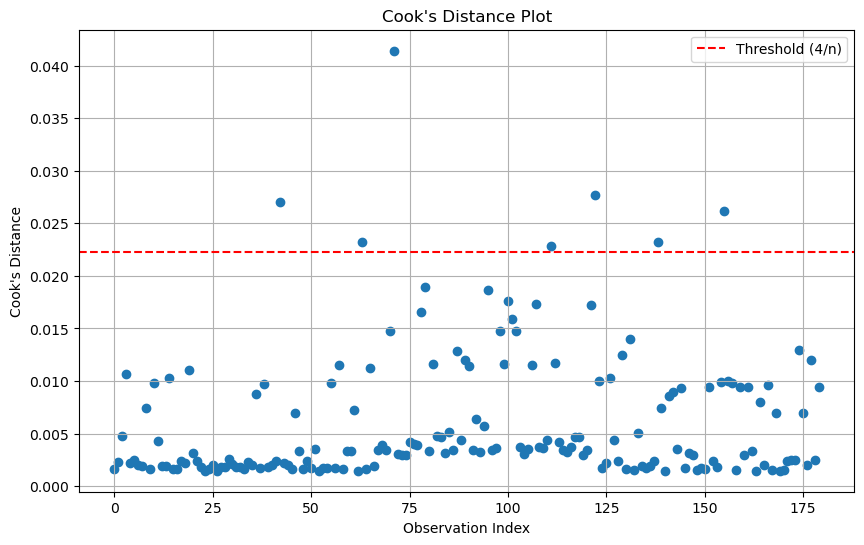

Number of observations with high influence (Cook's D > 4/n): 7

VIF for final model:


MissingDataError: exog contains inf or nans

In [679]:
# Cell 10: Check model diagnostics and assumptions for the final model
print("Model Diagnostics for Final Model:")

# 1. Check for influential observations
influence = model_step2.get_influence()
cooks_distance = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cooks_distance)), cooks_distance)
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.axhline(y=4/len(y), color='r', linestyle='--', label='Threshold (4/n)')
plt.legend()
plt.grid(True)
plt.show()

# Count observations with high Cook's distance
high_influence = np.sum(cooks_distance > 4/len(y))
print(f"Number of observations with high influence (Cook's D > 4/n): {high_influence}")

# 2. Check for multicollinearity in final model
print("\nVIF for final model:")
X_final = df[['GENDER', 'AGE', 'DUM-CIV3']]
X_final = add_constant(X_final)
vif_data_final = pd.DataFrame()
vif_data_final["Feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
print(vif_data_final)

In [680]:
# Cell 11: Summary of assumption checks
print("Summary of Assumption Checks:")
print("=" * 50)

print("1. Additivity/Multicollinearity:")
vif_values = vif_data_final["VIF"].iloc[1:]  # Exclude constant
max_vif = vif_values.max()
print(f"   Maximum VIF: {max_vif:.2f}")
if max_vif < 5:
    print("   => No significant multicollinearity detected")
elif max_vif < 10:
    print("   => Moderate multicollinearity, but likely acceptable")
else:
    print("   => High multicollinearity detected")

print("\n2. Linearity of the logit:")
print(f"   Correlation between binned AGE and logit: {correlation:.3f}")
if abs(correlation) > 0.7:
    print("   => Suggests good linearity")
else:
    print("   => May suggest non-linearity")

print("\n3. Homogeneity/Perfect separation:")
# Check if any cells in crosstab have zero outcomes
has_zero = (crosstab_check == 0).any().any()
if not has_zero:
    print("   => No evidence of perfect separation")
else:
    print("   => Possible perfect separation detected")

print("\n4. Homoscedasticity/Overdispersion:")
print(f"   Dispersion parameter: {dispersion:.3f}")
if 0.8 <= dispersion <= 1.2:
    print("   => No significant overdispersion")
elif dispersion < 0.8:
    print("   => Underdispersion detected")
else:
    print("   => Overdispersion detected")

print("\n5. Normality of residuals:")
print(f"   Shapiro-Wilk p-value: {shapiro_p:.3f}")
if shapiro_p > 0.05:
    print("   => Residuals appear normally distributed")
else:
    print("   => Residuals may not be normally distributed")
print("   Note: This is not a critical assumption for logistic regression")

print("\nModel Results Summary:")
print(f"DUM-CIV3 coefficient: {model_step2.params['DUM-CIV3']:.3f}")
print(f"DUM-CIV3 p-value: {model_step2.pvalues['DUM-CIV3']:.3f}")
if model_step2.pvalues['DUM-CIV3'] < 0.05:
    print("=> Significant effect of university defendant (DUM-CIV3)")
    if model_step2.params['DUM-CIV3'] > 0:
        print("=> University defendant increases odds of ruling for plaintiff")
    else:
        print("=> University defendant decreases odds of ruling for plaintiff")
else:
    print("=> No significant effect of university defendant (DUM-CIV3)")

Summary of Assumption Checks:
1. Additivity/Multicollinearity:


KeyError: 'VIF'

### 💾 Save the data set!

In [681]:
hyp1_df.to_csv("hypothesis-1-dataset.csv")